# MNIST ML - Load / process raw data

In [35]:
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras 

print(sys.executable)
print(os.getcwd())
print(os.listdir('../data'))  # this is where raw training / testing data is stored


MODEL_SEMVER = '0.2.0'

C:\Users\tjvan\Documents\local_programs\miniconda3\envs\pyds\python.exe
C:\Users\tjvan\Documents\projects_for_learning\01_pynumdraw\pynumdraw\back_end
['README.txt', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


In [2]:
sys.version

'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

In [3]:
def read_mnist_image_data(image_data_file):
    """
    image_data_file: path to the mnist image data file on disk.
    
    returns a dictionary with the following keys:
    - magic_number: to be compared against the magic number for each file on MNIST website
    - number_of_images: the number of images included in the dataset
    - pixel_rows: the number of pixels per row per image
    - pixel_cols: the number of pixels per column per image
    - data: the actual image data as ndarray with shape of (number_of_images, pixel_rows, pixel_cols)
    """
    
    results = {}
    
    with open(image_data_file, 'rb') as f:
        _data = f.read()
        
    results['magic_number'] = int.from_bytes(_data[0:4], 'big')
    results['number_of_images'] = int.from_bytes(_data[4:8], 'big')
    results['pixel_rows'] = int.from_bytes(_data[8:12], 'big')
    results['pixel_cols'] = int.from_bytes(_data[12:16], 'big')
    
    pixel_data = np.asarray([pixel for pixel in _data[16:]])
    pixel_data = pixel_data.reshape(results['number_of_images'], results['pixel_rows'], results['pixel_cols'])
    results['data'] = pixel_data
    
    return results
    
    
def read_mnist_label_data(label_data_file):
    """
    label_data_file: path to the mnist label data file on disk.
    
    returns a dictionary with the following keys:
    - magic_number: to be compared against the magic number for each file on MNIST website
    - number_of_labels: the number of labels included in the dataset
    - labels: the actual label data as ndarray (1 dimensional)
    """
    
    results = {}
    
    with open(label_data_file, 'rb') as f:
        _data = f.read()
        
    results['magic_number'] = int.from_bytes(_data[0:4], 'big')
    results['number_of_labels'] = int.from_bytes(_data[4:8], 'big')    
    results['labels'] = np.asarray([(label / 1.0) for label in _data[8:]]).astype('int')
    
    return results
    
    

In [4]:
# set up training images (divide )
x_train = read_mnist_image_data("../data/train-images-idx3-ubyte")['data'] / 255.0
y_train = read_mnist_label_data("../data/train-labels-idx1-ubyte")['labels']

x_validation = read_mnist_image_data('../data/t10k-images-idx3-ubyte')['data'] /255.0
y_validation = read_mnist_label_data('../data/t10k-labels-idx1-ubyte')['labels']


In [5]:
class_names = [str(x) for x in range(0, 10)]
class_names

num_classes = len(class_names)
num_classes

batch_size = 128

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
print(np.expand_dims(x_train, axis=3).shape)
print(np.expand_dims(x_validation, axis=3).shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
x_train = np.expand_dims(x_train, axis=3)
x_validation = np.expand_dims(x_validation, axis=3)

print(x_train.shape)
print(x_validation.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py#L47-L61

input_shape = (28, 28, 1)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [11]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10)
# ])


# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])



In [13]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=3)





Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 105s 2ms/sample - loss: 1.4878 - accuracy: 0.9739
Epoch 2/3
60000/60000 [==============================] - 105s 2ms/sample - loss: 1.4857 - accuracy: 0.9762
Epoch 3/3
60000/60000 [==============================] - 105s 2ms/sample - loss: 1.4825 - accuracy: 0.9793
10000/10000 - 5s - loss: 1.4734 - accuracy: 0.9883

Test accuracy: 0.9883


In [14]:
test_loss, test_acc = model.evaluate(x_validation,  y_validation, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 5s - loss: 1.4734 - accuracy: 0.9883

Test accuracy: 0.9883


In [20]:
np.expand_dims(x_validation[1, :, :, :], axis=0).shape

(1, 28, 28, 1)

## How to generate predicted probabilities for single image

In [54]:
test_indx = 2
single_image = x_validation[test_indx, :, :, :]
single_image = single_image.reshape((28, 28))
print(single_image.shape)
print("need to add another dimension at the beginning to this")

# single_image = np.expand_dims(single_image, axis=0)
single_image = single_image.reshape((1, 28, 28, 1))
print(single_image.shape)
print("now it's ready for prediction")

(28, 28)
need to add another dimension at the beginning to this
(1, 28, 28, 1)
now it's ready for prediction


In [55]:
single_prediction = model.predict( single_image)
single_prediction

array([[8.0652593e-16, 1.0000000e+00, 3.5231417e-16, 4.0224308e-25,
        4.6478939e-13, 1.0854657e-21, 1.4846377e-14, 1.3849929e-15,
        4.4875524e-17, 4.4264748e-20]], dtype=float32)

## How to get the actual predicted value

In [56]:
single_prediction.shape

(1, 10)

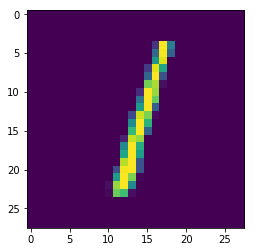

In [57]:
from matplotlib.pyplot import imshow
imshow(single_image.reshape((28, 28)))

In [58]:
np.argmax(single_prediction, axis=1)

array([1], dtype=int64)

In [44]:
np.max(single_prediction)

1.0

In [ ]:
x_validation[]

# Model Plotting / Basic Testing

In [37]:
tf.keras.models.save_model(model, f"pynumdraw_model_{MODEL_SEMVER}.hdf5")

In [ ]:
# probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
probability_model = tf.keras.models.load_model('pynumdraw_model.hdf5', compile=False)
# this is how you generate a batch of the prediction array
predictions = probability_model.predict(x_validation)

In [ ]:

# this is how you generate a single prediction
image_index = 0
predicted_probabilities = probability_model.predict(x_validation[image_index, :, :].reshape((1, 28, 28)))
print(predicted_probabilities)


# this is how you find the confidence of that prediction (max of all of the values)
print(np.max(predicted_probabilities))
print( 100 * np.max(predicted_probabilities))



In [ ]:
def plot_image(i, predictions_array, true_label, img):
    
    true_label = true_label.astype('int')
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    
    true_label = true_label.astype('int')
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [ ]:
x = np.array([1, 2, 3, 4])

In [ ]:
x.astype('int')